In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import photutils

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=15)

In [3]:
bias = np.arange(1028,1039,1)
dark5 = np.arange(1039, 1044,1)
dark10 = np.arange(1044,1049,1)
dark20 = np.arange(1049, 1054,1)

dflat = np.arange(1054, 1070,1)

skyflat = np.arange(1134,1139,1)

In [4]:
print(len(bias))

11


In [5]:
bias_median = np.zeros(shape=(1024, 1056))

bias_master = np.zeros(shape = (11, 1024, 1056))
i=0
for bi in bias:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(bi)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    bias_master[i,:] = loop_img
    
    i+=1

In [ ]:
bias_test

In [6]:
from tqdm import tqdm
#taking median of all bias measurements. Inefficient nested loop but should be fine.
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        bias_median[i,j] = np.median(bias_master[:,i,j])
        

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:55<00:00, 18.51it/s]


In [ ]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Bias_Median.npy", bias_median)

Text(0.5, 1.0, 'Bias Median')

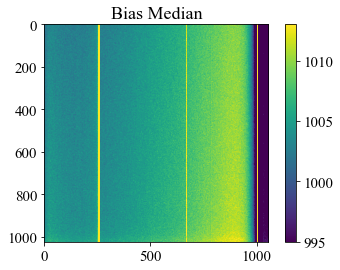

In [6]:
#plotting to check
Z = plt.imshow(bias_median, vmin=995, vmax=1013)
plt.colorbar(Z)

plt.title("Bias Median")

In [7]:
# appending all darks into one 3d array
dark_master = np.zeros(shape=(15, 1024, 1056))

i =0
for d5 in dark5:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d5)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/5 #subtracting bias from dark and dividing by exposure time.
    i+=1
    
for d10 in dark10:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d10)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/10
    i+=1
    
for d20 in dark20:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(d20)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    dark_master[i, :] = (loop_img-bias_median)/20
    i+=1
    

In [8]:
#taking the median of all darks, same as before
dark_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        dark_median[i,j] = np.median(dark_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:53<00:00, 19.26it/s]


In [27]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Dark_Median.npy", dark_median)

Text(0.5, 1.0, 'Dark Image Median')

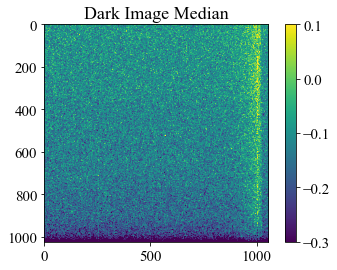

In [8]:
#plotting to check
Z = plt.imshow(dark_median, vmin=-0.3, vmax=0.1)
plt.colorbar(Z)

plt.title("Dark Image Median")

In [12]:
#Appending all sky flats into one 3d array. No loop here because we only had 5 skyflats.
flat_field_master = np.zeros(shape=(5, 1024, 1056))

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1134.fits')
loop_img = np.asarray(loop_hdul[0].data)

#subtracting the bias, then dividing by exposure time, and then subtracting the dark obtained in previous cell    
numerator = ((loop_img-bias_median)/5) - dark_median
flat_field_master[0, :] = numerator/np.median(numerator) #normalizing it

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1135.fits')
loop_img = np.asarray(loop_hdul[0].data)

numerator = ((loop_img-bias_median)/6) - dark_median
flat_field_master[1, :] = numerator/np.median(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1136.fits')
loop_img = np.asarray(loop_hdul[0].data)

numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[2, :] = numerator/np.median(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1137.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[3, :] = numerator/np.median(numerator)

loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d1138.fits')
loop_img = np.asarray(loop_hdul[0].data)
    
numerator = ((loop_img-bias_median)/10) - dark_median
flat_field_master[4, :] = numerator/np.median(numerator)

In [13]:
#taking the median of all the sky_flats like before
flat_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        flat_median[i,j] = np.median(flat_field_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:53<00:00, 19.10it/s]


Text(0.5, 1.0, 'Flat Field Image Normalized Median')

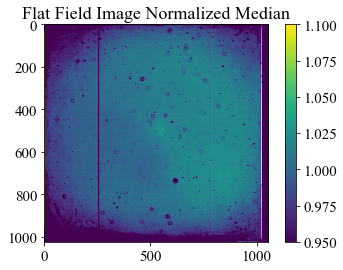

In [14]:
#normalizing the flat by the mean value

#plotting to check.
Z = plt.imshow(flat_median, vmin=0.95, vmax=1.1)
plt.colorbar(Z)

plt.title("Flat Field Image Normalized Median")

In [15]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Flat_Median.npy", flat_median)

In [16]:
#index of science observations
science = np.arange(1178, 1190, 1)

#Appending all science observations into one 3d array
science_master = np.zeros(shape=(12, 1024, 1056))

i=0
for pluto in science:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(pluto)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    #Subtract bias, divide by exposure time, then subtract dark. Divide all that by the normalized flat
    science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median
    i+=1

<ipython-input-16-8ed3c3b7bcb1>:13: RuntimeWarning: divide by zero encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median
<ipython-input-16-8ed3c3b7bcb1>:13: RuntimeWarning: invalid value encountered in true_divide
  science_master[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median


In [17]:
#taking the median of all science data.
science_median = np.zeros(shape=(1024,1056))
for i in tqdm(range(0, 1024)):
    for j in range(0, 1056):
        science_median[i,j] = np.median(science_master[:,i,j])

100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:55<00:00, 18.52it/s]


(0.0, 1014.0)

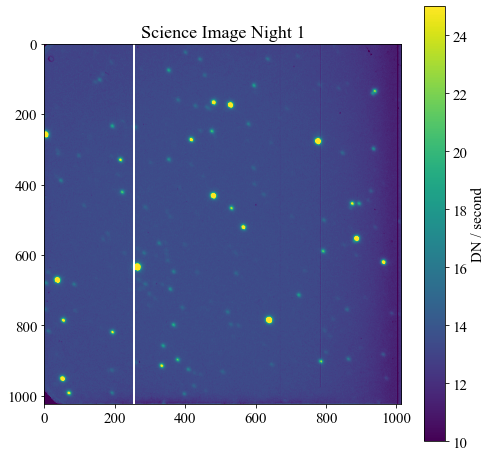

In [18]:
#plotting to check. 
plt.figure(figsize=(8,8))
Z = plt.imshow(science_median, vmin=10, vmax=25)
cbar=plt.colorbar(Z)
cbar.set_label("DN / second")
plt.title("Science Image Night 1")
plt.xlim(0,1014)

In [19]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Science_Median1.npy", science_median)

In [20]:
science_master2 = np.zeros(shape=(2, 1024, 1056))

i=0
for pluto in [2104, 2105]:
    loop_hdul = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\d'+str(pluto)+'.fits')
    loop_img = np.asarray(loop_hdul[0].data)
    
    #Subtract bias, divide by exposure time, then subtract dark. Divide all that by the normalized flat
    science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median
    i+=1
    
science_median2 = np.zeros(shape=(1024,1056))
for i in tqdm(range(0,1024)):
    for j in range(0,1056):
        science_median2[i,j] = np.median(science_master2[:,i,j])

<ipython-input-20-fca4acb1d8a3>:9: RuntimeWarning: divide by zero encountered in true_divide
  science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median
<ipython-input-20-fca4acb1d8a3>:9: RuntimeWarning: invalid value encountered in true_divide
  science_master2[i, :] = (((loop_img-bias_median)/15) - dark_median)/flat_median
100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:57<00:00, 17.82it/s]


(0.0, 1014.0)

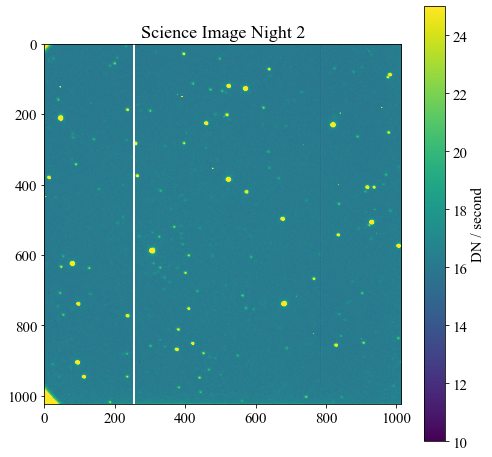

In [21]:
plt.figure(figsize=(8,8))
Z = plt.imshow(science_median2, vmin=10, vmax=25)
cbar=plt.colorbar(Z)
cbar.set_label("DN / second")
plt.title("Science Image Night 2")
plt.xlim(0,1014)

In [22]:
np.save("C:\\Users\\dougl\\Desktop\\Githubwork\\Callibration Pluto\Science_Median2.npy", science_median2)

In [24]:
x2 = 574
y2 = 422

print(photutils.centroids.centroid_sources(science_median2, x2, y2))


cutout2 = science_median2[422-250:422+250, 574-250:574+250]

x1 = 532
y1 = 469

print(photutils.centroids.centroid_sources(science_median, x1, y1))
cutout1 = science_median[469-250:469+250, 532-250:532+250]



(array([573.99531374]), array([421.940533]))
(array([531.89116858]), array([468.8298609]))


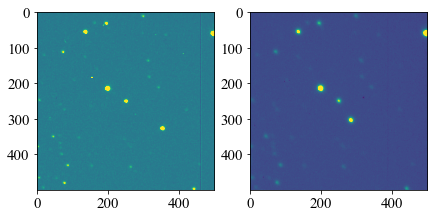

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,5))
axs[0].imshow(cutout2, vmin=10, vmax=25.)
axs[1].imshow(cutout1, vmin=10, vmax=25)

In [26]:
hdu = fits.PrimaryHDU(cutout2)
hdu.writeto('Pluto2.fits', overwrite=True)

hdu = fits.PrimaryHDU(cutout1)
hdu.writeto('Pluto1.fits', overwrite=True)

In [27]:
plutox1 = 288
plutoy1 = 305

px1, py1 = photutils.centroids.centroid_sources(cutout1, plutox1, plutoy1)

plutox2 = 354
plutoy2 = 328

px2, py2 = photutils.centroids.centroid_sources(cutout2, plutox2, plutoy2)

dx = (px1 - px2)**2
dy = (py1 - py2)**2

distance = np.sqrt(dx + dy)
print("Pluto moved "+str(distance[0])+" pixels in ~24 hours")

Pluto moved 69.95850047779678 pixels in ~24 hours


In [28]:
#Nickel has a  0.184 arcsec/pixel plate scale, so then to convert we just multiply

distance_arcs = distance*0.184

print("Pluto moved "+str(distance_arcs[0])+" arcseconds in ~24 hours")

Pluto moved 12.872364087914606 arcseconds in ~24 hours
